In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing data into a data frame


In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/som-choudhary/Airbnb/main/Airbnb_new.csv')

In [3]:
data.head()

,Unnamed: 0,id,name,host_id,host_name,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,10/19/18,0.21,6.0,365.0
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,NaN,5/21/19,0.38,2.0,NaN
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,NaN,harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,clinton hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,07-05-2019,4.64,1.0,194.0
4,5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,murray hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,6/22/19,0.59,1.0,129.0


In [4]:
data.dtypes

Unnamed: 0                          int64
id                                  int64
name                               object
host_id                             int64
host_name                          object
borough                            object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
dtype: object

In [5]:
data.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,42638.000000,4.263800e+04,4.263800e+04,42607.000000,42609.000000,42602.000000,42604.000000,42613.000000,33902.000000,42622.000000,42596.000000
mean,24323.437544,1.892386e+07,6.633856e+07,40.725488,-73.949830,148.516173,6.974298,23.045080,1.346574,6.840036,111.562447
std,14062.225405,1.094655e+07,7.755554e+07,0.054140,0.046089,235.828980,20.295628,44.411525,1.636901,32.246048,131.392817
min,0.000000,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,12117.250000,9.410163e+06,7.650650e+06,40.688225,-73.979220,65.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,24300.500000,1.956904e+07,3.028359e+07,40.718130,-73.954370,100.000000,3.000000,5.000000,0.690000,1.000000,42.000000
75%,36444.500000,2.897789e+07,1.056342e+08,40.756690,-73.933800,174.000000,5.000000,23.000000,2.000000,2.000000,224.000000
max,48892.000000,3.648543e+07,2.743115e+08,40.904840,-73.712990,10000.000000,1250.000000,629.000000,20.940000,327.000000,365.000000


In [6]:
#Cleaning Data

## Removing Columns we don't need

In [7]:
# Removing id,host_name and last_review
data=data.drop(["id","host_name","last_review"],axis =1)

## Dealing with Null values

In [8]:
# Number of null values
data.isna().sum()

Unnamed: 0                           0
name                                14
host_id                              0
borough                             67
neighbourhood                        0
latitude                            31
longitude                           29
room_type                           86
price                               36
minimum_nights                      34
number_of_reviews                   25
reviews_per_month                 8736
calculated_host_listings_count      16
availability_365                    42
dtype: int64

In [9]:
#Percentage wise
data.isna().sum()/len(data)*100

Unnamed: 0                         0.000000
name                               0.032835
host_id                            0.000000
borough                            0.157137
neighbourhood                      0.000000
latitude                           0.072705
longitude                          0.068014
room_type                          0.201698
price                              0.084432
minimum_nights                     0.079741
number_of_reviews                  0.058633
reviews_per_month                 20.488766
calculated_host_listings_count     0.037525
availability_365                   0.098504
dtype: float64

In [10]:
#Reviews per month has the highest percentage.. we can handle it by imputing it with 0

data.reviews_per_month=data.reviews_per_month.fillna(0)


In [11]:
#Checking percentage again
data.isna().sum()/len(data)*100

Unnamed: 0                        0.000000
name                              0.032835
host_id                           0.000000
borough                           0.157137
neighbourhood                     0.000000
latitude                          0.072705
longitude                         0.068014
room_type                         0.201698
price                             0.084432
minimum_nights                    0.079741
number_of_reviews                 0.058633
reviews_per_month                 0.000000
calculated_host_listings_count    0.037525
availability_365                  0.098504
dtype: float64

In [12]:
#Other values have very few missing values so we can drop the rows.

data.dropna(inplace=True)

In [13]:
#Check
data.isna().sum()/len(data)*100

Unnamed: 0                        0.0
name                              0.0
host_id                           0.0
borough                           0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

In [14]:
#All Missing values removed


In [15]:
## Data types
data.dtypes

Unnamed: 0                          int64
name                               object
host_id                             int64
borough                            object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
dtype: object

## Standardizing various categorical columns

In [16]:
## Looking at boroughs
data.borough

0         Brooklyn
3         Brooklyn
4        Manhattan
7        Manhattan
8         Brooklyn
           ...    
42633     Brooklyn
42634       Queens
42635     Brooklyn
42636     Brooklyn
42637    Manhattan
Name: borough, Length: 42346, dtype: object

In [17]:
## no. of boroughs

data.borough.nunique()

## We know that there are only 5 boroughs in NYC

10

In [18]:
## Looking at them in detail we see that some of them are misspelled

data.borough.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Brookly', 'Staten Island',
       'Bronx', 'Queen', 'Manhattn', 'Manhatteen', 'Mahattan'],
      dtype=object)

In [19]:
## Replacing the incorrect spelling
data=data.replace('Brookly',"Brooklyn").replace("Queen","Queens").replace(["Manhatteen","Manhattn","Mahattan"],"Manhattan")

In [20]:
#Check
data.borough.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [21]:
## Looking at no. of neighbourhoods
data.neighbourhood.nunique()

170

In [22]:
## Looking at the variety of rooms available
data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

## Outlier Removal

In [23]:
##Looking at price column
data.price.describe()

count    42346.000000
mean       148.617390
std        236.390978
min          0.000000
25%         65.000000
50%        100.000000
75%        174.000000
max      10000.000000
Name: price, dtype: float64

In [24]:
## we see that minimum price here is 0, which doesn't make much sense
## max price also seems a lot higher than the mean.

In [25]:
## Each neighbourhood will have different price points. Some of them are more expensive than the others. We have to look for outliers within each neighbourhood.

## Looking at neighbourhood with maximum rental properties

top_10_neighbourhoods=data.neighbourhood.value_counts().head(10)

In [26]:
top_10_neighbourhoods

williamsburg          3882
bedford-stuyvesant    3675
harlem                2643
bushwick              2446
upper west side       1955
east village          1842
upper east side       1785
crown heights         1552
midtown               1535
chelsea               1105
Name: neighbourhood, dtype: int64

In [27]:
top_10_neighbourhoods_list=top_10_neighbourhoods.index

In [28]:
top_10_neighbourhoods_list

Index(['williamsburg', 'bedford-stuyvesant', 'harlem', 'bushwick',
       'upper west side', 'east village', 'upper east side', 'crown heights',
       'midtown', 'chelsea'],
      dtype='object')

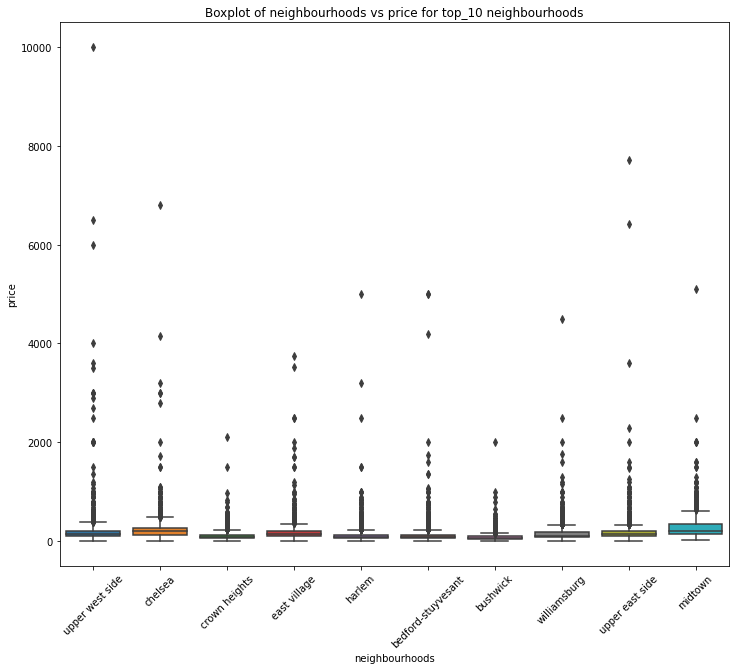

In [29]:
## Charting a box plot of the top_10_neighbourhoods for reference
plt.figure(figsize=[12,10])
v1=sns.boxplot(data=data[data["neighbourhood"].isin(top_10_neighbourhoods_list)],x="neighbourhood",y="price")
v1.set(title="Boxplot of neighbourhoods vs price for top_10 neighbourhoods",xlabel="neighbourhoods",ylabel="price")
v1.set_xticklabels(v1.get_xticklabels(),rotation=45)
plt.show()

In [30]:
##As we can see there are plenty of outliers present in our data

In [31]:
##Caluclation of IQR for price
Q1=data.price.quantile(0.25)
Q3=data.price.quantile(0.75)
IQR=Q3-Q1

In [32]:
print(Q1)
print(Q3)
print(IQR)

65.0
174.0
109.0


In [33]:
## outliers are data points above Q3+1.5*IQR range or below Q1-1.5*IQR range

In [34]:
##Defining a function to get outliers from any datafram

def outlier(dataset):
  Q1=dataset.quantile(0.25)
  Q3=dataset.quantile(0.75)
  IQR=Q3-Q1
  d1=dataset[(dataset>(Q3+1.5*IQR)) |(dataset<(Q1-1.5*IQR))]
  return d1

In [35]:
##Applying the function to our current dataset
## Getting outliers for each neighbourhood as different neighbourhoods will have different outliers

neighbourhood_list=list(data.neighbourhood.unique())

## converting array into a list for future analysis

In [36]:
neighbourhood_list

['kensington',
 'clinton hill',
 'murray hill',
 'upper west side',
 'south slope',
 'chelsea',
 'crown heights',
 'park slope',
 'windsor terrace',
 'inwood',
 'east village',
 'harlem',
 'bedford-stuyvesant',
 'bushwick',
 'flatbush',
 'fort greene',
 'greenpoint',
 'kips bay',
 'williamsburg',
 'soho',
 'upper east side',
 'washington heights',
 'woodside',
 'brooklyn heights',
 'prospect heights',
 'carroll gardens',
 'lower east side',
 'flatlands',
 'cobble hill',
 'flushing',
 'boerum hill',
 'sunnyside',
 'gowanus',
 'st. george',
 'highbridge',
 'financial district',
 'ridgewood',
 'jamaica',
 'middle village',
 'roosevelt island',
 'chinatown',
 'midtown',
 'little italy',
 'east flatbush',
 'tompkinsville',
 'astoria',
 'kingsbridge',
 'queens village',
 'forest hills',
 'greenwich village',
 'woodlawn',
 'morningside heights',
 'gravesend',
 'gramercy',
 'east new york',
 'concourse village',
 'sheepshead bay',
 'emerson hill',
 'long island city',
 'bensonhurst',
 'tribeca

In [37]:
index_of_outlier=[]
for i in neighbourhood_list:
  L=outlier(data[data["neighbourhood"]==i].price).index
  index_of_outlier.extend(L)  
index_of_outlier

[935,
 2034,
 2160,
 2214,
 2278,
 3427,
 3681,
 3895,
 4312,
 4501,
 10931,
 19365,
 26792,
 27663,
 32955,
 37589,
 275,
 295,
 553,
 886,
 994,
 1444,
 2835,
 3313,
 3550,
 3835,
 3836,
 4353,
 7051,
 7056,
 7608,
 7862,
 8718,
 10334,
 10400,
 10703,
 12420,
 15578,
 16998,
 17410,
 20094,
 20297,
 20866,
 20937,
 22129,
 24976,
 26768,
 28645,
 28893,
 28934,
 29970,
 33319,
 36730,
 39802,
 40565,
 42464,
 1761,
 2418,
 3176,
 6412,
 9549,
 22568,
 23041,
 23201,
 23696,
 24397,
 30464,
 31003,
 31471,
 32091,
 32323,
 32570,
 35484,
 36539,
 36971,
 38001,
 38063,
 38771,
 38832,
 39754,
 40109,
 40265,
 40295,
 40439,
 40511,
 40542,
 41377,
 437,
 779,
 825,
 919,
 1239,
 1291,
 1355,
 1472,
 2064,
 2463,
 2597,
 2622,
 2638,
 2930,
 3088,
 3094,
 3101,
 3134,
 3158,
 3171,
 3229,
 3241,
 3267,
 3274,
 3329,
 3333,
 3355,
 3373,
 3632,
 4781,
 4986,
 5123,
 5355,
 5613,
 6140,
 6569,
 6597,
 6920,
 6986,
 7463,
 7535,
 7776,
 8071,
 8085,
 8491,
 8699,
 9889,
 10091,
 10469,
 

In [38]:
## Number of outliers in total:
len(index_of_outlier)

2728

In [39]:
## Dropping all the outliers

data_cleaned=data.drop(index_of_outlier)

In [40]:
data_cleaned

,Unnamed: 0,name,host_id,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,Clean & quiet apt home by the park,2787,Brooklyn,kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,0.21,6.0,365.0
3,3,Cozy Entire Floor of Brownstone,4869,Brooklyn,clinton hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,4.64,1.0,194.0
4,5,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,murray hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,0.59,1.0,129.0
7,10,Beautiful 1br on Upper West Side,7702,Manhattan,upper west side,40.80316,-73.96545,Entire home/apt,135.0,5.0,53.0,0.43,1.0,6.0
8,12,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Brooklyn,south slope,40.66829,-73.98779,Private room,89.0,4.0,167.0,1.34,3.0,314.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42633,48887,Garden Jewel Apartment in Williamsburg New York,208514239,Brooklyn,williamsburg,40.71232,-73.94220,Entire home/apt,170.0,1.0,0.0,0.00,3.0,365.0
42634,48889,QUIT PRIVATE HOUSE,107716952,Queens,jamaica,40.69137,-73.80844,Private room,65.0,1.0,0.0,0.00,2.0,163.0
42635,48890,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,bedford-stuyvesant,40.67853,-73.94995,Private room,70.0,2.0,0.0,0.00,2.0,9.0
42636,48891,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,bushwick,40.70184,-73.93317,Private room,40.0,4.0,0.0,0.00,2.0,36.0


In [41]:
## Exporting the cleaned dataset

data_cleaned.to_csv("data_cleaned")

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
data_cleaned.to_csv('drive/My Drive/data_cleaned.csv')

In [44]:
data_cleaned

,Unnamed: 0,name,host_id,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,Clean & quiet apt home by the park,2787,Brooklyn,kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,0.21,6.0,365.0
3,3,Cozy Entire Floor of Brownstone,4869,Brooklyn,clinton hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,4.64,1.0,194.0
4,5,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,murray hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,0.59,1.0,129.0
7,10,Beautiful 1br on Upper West Side,7702,Manhattan,upper west side,40.80316,-73.96545,Entire home/apt,135.0,5.0,53.0,0.43,1.0,6.0
8,12,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Brooklyn,south slope,40.66829,-73.98779,Private room,89.0,4.0,167.0,1.34,3.0,314.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42633,48887,Garden Jewel Apartment in Williamsburg New York,208514239,Brooklyn,williamsburg,40.71232,-73.94220,Entire home/apt,170.0,1.0,0.0,0.00,3.0,365.0
42634,48889,QUIT PRIVATE HOUSE,107716952,Queens,jamaica,40.69137,-73.80844,Private room,65.0,1.0,0.0,0.00,2.0,163.0
42635,48890,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,bedford-stuyvesant,40.67853,-73.94995,Private room,70.0,2.0,0.0,0.00,2.0,9.0
42636,48891,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,bushwick,40.70184,-73.93317,Private room,40.0,4.0,0.0,0.00,2.0,36.0


## Comparison of cleaned and uncleaned data

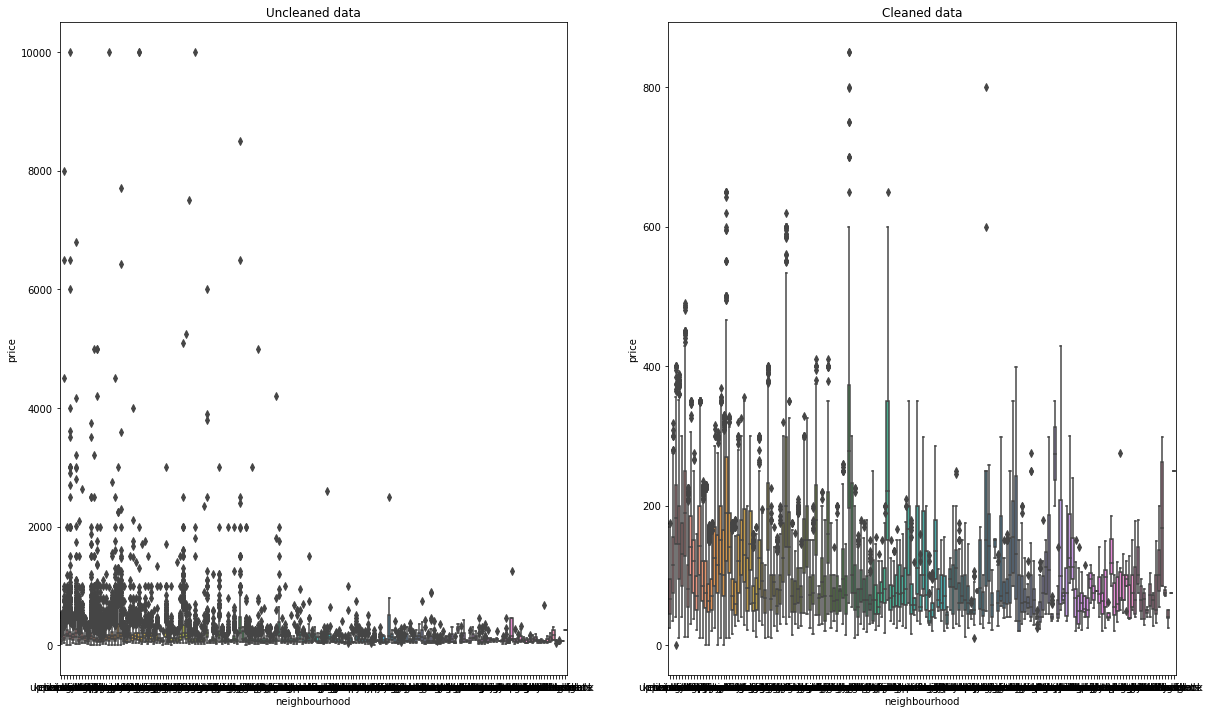

In [45]:

fig,axes=plt.subplots(1,2,figsize=(20,12))
sns.boxplot(data=data,x="neighbourhood",y="price",ax=axes[0]).set(title="Uncleaned data")
sns.boxplot(data=data_cleaned,x="neighbourhood",y="price",ax=axes[1]).set(title="Cleaned data")
plt.show()

In [46]:
## Top_10 neighbourhoods for better visibility

neighborhood_data=data[data["neighbourhood"].isin(top_10_neighbourhoods_list)]
neighborhood_data_cleaned=data_cleaned[data_cleaned["neighbourhood"].isin(top_10_neighbourhoods_list)]

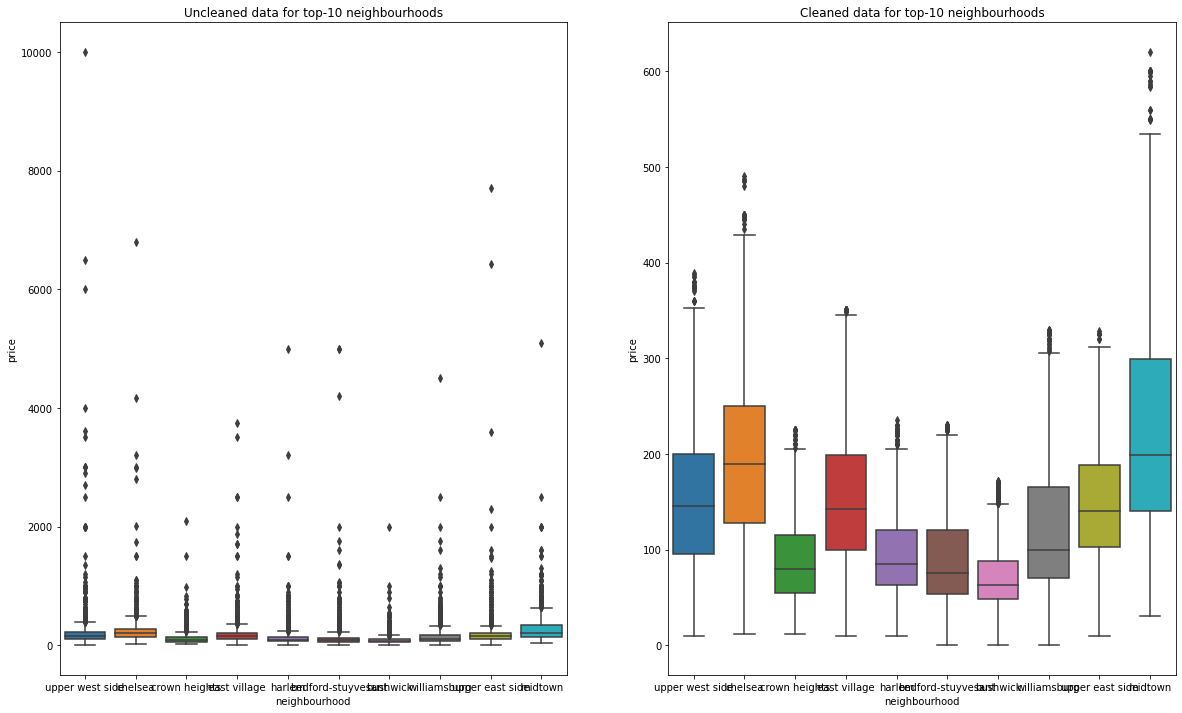

In [47]:
fig,axes=plt.subplots(1,2,figsize=(20,12))
sns.boxplot(data=neighborhood_data,x="neighbourhood",y="price",ax=axes[0]).set(title="Uncleaned data for top-10 neighbourhoods")
sns.boxplot(data=neighborhood_data_cleaned,x="neighbourhood",y="price",ax=axes[1]).set(title="Cleaned data for top-10 neighbourhoods")
plt.show()

## EDA

In [48]:
## Host analysis Question:Which hosts have more than one property up for rent? What is the maximum number of properties owned by one host?

In [49]:
top_20_hosts=data_cleaned.host_id.value_counts().head(20)

In [50]:
top_20_hosts

219517861    245
107434423    166
137358866     97
12243051      96
22541573      77
61391963      76
16098958      72
30283594      63
7503643       52
120762452     50
200380610     47
2856748       43
1475015       42
26377263      39
19303369      37
25237492      34
119669058     33
76104209      33
238321374     32
113805886     31
Name: host_id, dtype: int64

In [51]:
data_cleaned["host_id"].value_counts().describe()

count    30700.000000
mean         1.290489
std          2.371705
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        245.000000
Name: host_id, dtype: float64

In [52]:
data_cleaned["host_id"].value_counts().quantile(0.95)
## 95% of people have 2 or fewer properties

2.0

In [53]:
data_cleaned[data_cleaned["host_id"].isin(top_20_hosts.index)]["borough"].value_counts()


Manhattan    1122
Brooklyn      129
Queens        113
Bronx           1
Name: borough, dtype: int64

In [54]:
data_cleaned[data_cleaned["host_id"].isin(top_20_hosts.index)]["borough"].value_counts(normalize=True)

## Out of top 20 hosts, most hosts in the list own places in Manhatten (82%)

Manhattan    0.821978
Brooklyn     0.094505
Queens       0.082784
Bronx        0.000733
Name: borough, dtype: float64

In [55]:
##Importing the original dataframe to find the name of the host with max properties(245) with host_id 219517861

df=pd.read_csv('https://raw.githubusercontent.com/som-choudhary/Airbnb/main/Airbnb_new.csv')

In [56]:
df[df["host_id"]==219517861].host_name
## Sonder NYC owns the max number of properties

33600    Sonder (NYC)
33601    Sonder (NYC)
33855    Sonder (NYC)
34863    Sonder (NYC)
34864    Sonder (NYC)
             ...     
41608    Sonder (NYC)
41609    Sonder (NYC)
41610    Sonder (NYC)
41715    Sonder (NYC)
41722    Sonder (NYC)
Name: host_name, Length: 285, dtype: object

In [57]:
d=data_cleaned.groupby(by="host_id").count()>1

In [58]:
list_of_hosts_with_more_than_one_property=list(d[d["name"]==True].index)

In [59]:
len(list_of_hosts_with_more_than_one_property)

4160

In [60]:
#4160 hosts have more than one property

In [61]:
data_for_list_of_hosts_with_more_than_one_property=data_cleaned[data_cleaned["host_id"].isin(list_of_hosts_with_more_than_one_property)]

In [62]:
data_for_list_of_hosts_with_more_than_one_property.to_csv("hosts.csv")
## For further analysis if needed

In [63]:
##Data frame for tope 20 hosts
s=pd.DataFrame(top_20_hosts).reset_index()

In [64]:
s=s.rename(columns={"index":"host_id","host_id":"P_houses"})

In [65]:
s

,host_id,P_houses
0,219517861,245
1,107434423,166
2,137358866,97
3,12243051,96
4,22541573,77
5,61391963,76
6,16098958,72
7,30283594,63
8,7503643,52
9,120762452,50


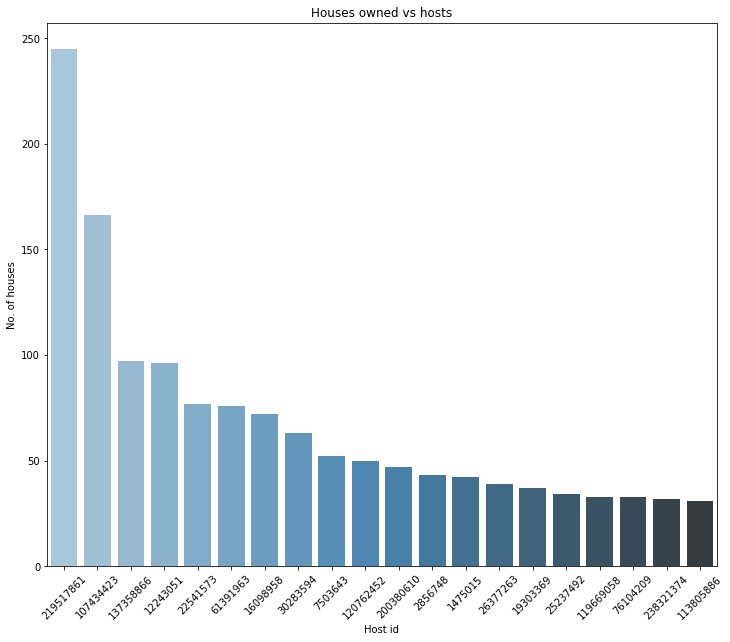

In [66]:
plt.figure(figsize=[12,10])
v=sns.barplot(data=s,x="host_id",y="P_houses",palette="Blues_d",order=s.sort_values("P_houses",ascending=False)["host_id"])
v.set(title="Houses owned vs hosts",xlabel="Host id",ylabel="No. of houses")
v.set_xticklabels(v.get_xticklabels(),rotation=45)
plt.show()

## Neighbourhood and Borough analysis

In [67]:
borough_analysis=data_cleaned.groupby(by="borough")["price"].describe()

In [68]:
borough_analysis

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Bronx,632.0,68.792722,46.433222,10.0,45.0,62.0,80.0,800.0
Brooklyn,18102.0,102.407469,57.571702,0.0,60.0,89.0,135.0,350.0
Manhattan,15719.0,154.016032,88.935128,0.0,90.0,135.0,200.0,850.0
Queens,4848.0,80.377063,42.093755,10.0,50.0,70.0,100.0,398.0
Staten Island,317.0,84.242902,55.269658,20.0,50.0,70.0,100.0,429.0


[Text(0.5, 1.0, 'Borough analysis')]

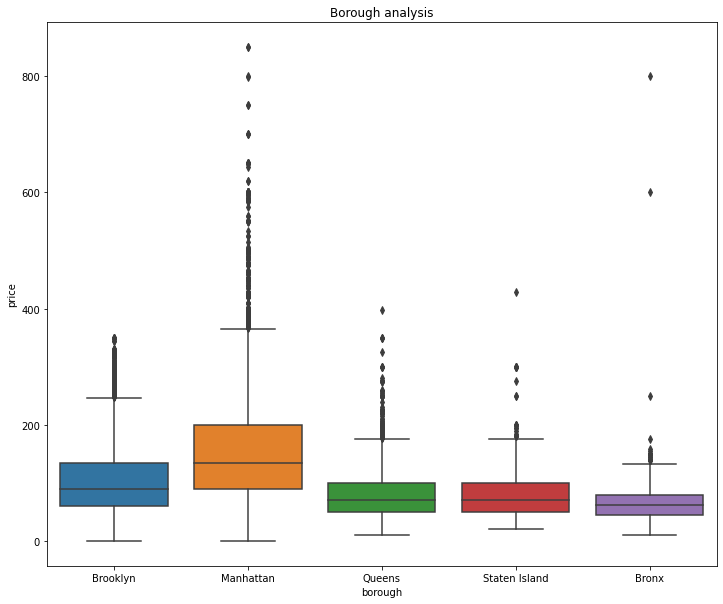

In [69]:
##Box plot analysis
plt.figure(figsize=[12,10])
sns.boxplot(data=data_cleaned,x="borough",y="price").set(title="Borough analysis")

In [70]:
## Manhattan is the most expensive borough

In [71]:
##No. or properties per borough
data_cleaned.borough.value_counts()

Brooklyn         18102
Manhattan        15719
Queens            4848
Bronx              632
Staten Island      317
Name: borough, dtype: int64

In [72]:
##Percentage wise
data_cleaned.borough.value_counts(normalize=True)*100

Brooklyn         45.691352
Manhattan        39.676410
Queens           12.236862
Bronx             1.595234
Staten Island     0.800141
Name: borough, dtype: float64

In [73]:
##Brooklyn has the most no. of properties

In [74]:
## NO. of properties per neighbourhood
data_cleaned.neighbourhood.value_counts()

williamsburg          3695
bedford-stuyvesant    3513
harlem                2465
bushwick              2275
upper west side       1826
                      ... 
westerleigh              2
silver lake              2
richmondtown             1
rossville                1
willowbrook              1
Name: neighbourhood, Length: 170, dtype: int64

In [75]:
##Percentage wise
data_cleaned.neighbourhood.value_counts(normalize=True)*100

williamsburg          9.326569
bedford-stuyvesant    8.867182
harlem                6.221919
bushwick              5.742339
upper west side       4.609016
                        ...   
westerleigh           0.005048
silver lake           0.005048
richmondtown          0.002524
rossville             0.002524
willowbrook           0.002524
Name: neighbourhood, Length: 170, dtype: float64

In [76]:
##Williamsburg neighbourhood has the most no. of properties

In [77]:
## No. of boroughs in each neighbourhood
neighbourhood_distribution=data_cleaned.groupby(by="borough").nunique()["neighbourhood"]

In [78]:
neighbourhood_distribution.sort_values(ascending=False)
## Queens has the most no. of neighbourhoods

borough
Queens           45
Brooklyn         41
Staten Island    35
Bronx            27
Manhattan        22
Name: neighbourhood, dtype: int64

In [79]:
##Neighbourhood vs price

p=pd.pivot_table(data=data_cleaned,index="neighbourhood",values="price",aggfunc=["mean","median"])
p=p.reset_index()
p=p.T
p=p.reset_index(drop=True)
p=p.T
p=p.rename(columns={0:"neighbourhood",1:"mean price",2:"median price"})
p

,neighbourhood,mean price,median price
0,arden heights,76.0,75.0
1,arrochar,89.5,65.0
2,arverne,136.138889,110.0
3,astoria,89.088863,80.0
4,bath beach,70.666667,59.0
...,...,...,...
165,willowbrook,249.0,249.0
166,windsor terrace,121.082759,120.0
167,woodhaven,55.531646,50.0
168,woodlawn,60.090909,68.0


##Room type analysis

In [80]:
data_cleaned.room_type.value_counts()

Private room       19442
Entire home/apt    19245
Shared room          931
Name: room_type, dtype: int64

In [81]:
data_cleaned.room_type.value_counts(normalize=True)*100

Private room       49.073653
Entire home/apt    48.576405
Shared room         2.349942
Name: room_type, dtype: float64

In [82]:
##Most of the rooms are private rooms or Entire home/apt

In [83]:
## Number of room types by boroughs
pd.pivot_table(data=data_cleaned,index="borough",columns="room_type",values="price",aggfunc=len)

room_type,Entire home/apt,Private room,Shared room
borough,,,
Bronx,188,415,29
Brooklyn,8081,9630,391
Manhattan,9258,6145,316
Queens,1583,3078,187
Staten Island,135,174,8


In [84]:
## Highest number of properties for our use case(Entire home/apt and Private Room) is located in Brooklyn and Manhattan

##Geographical analysis

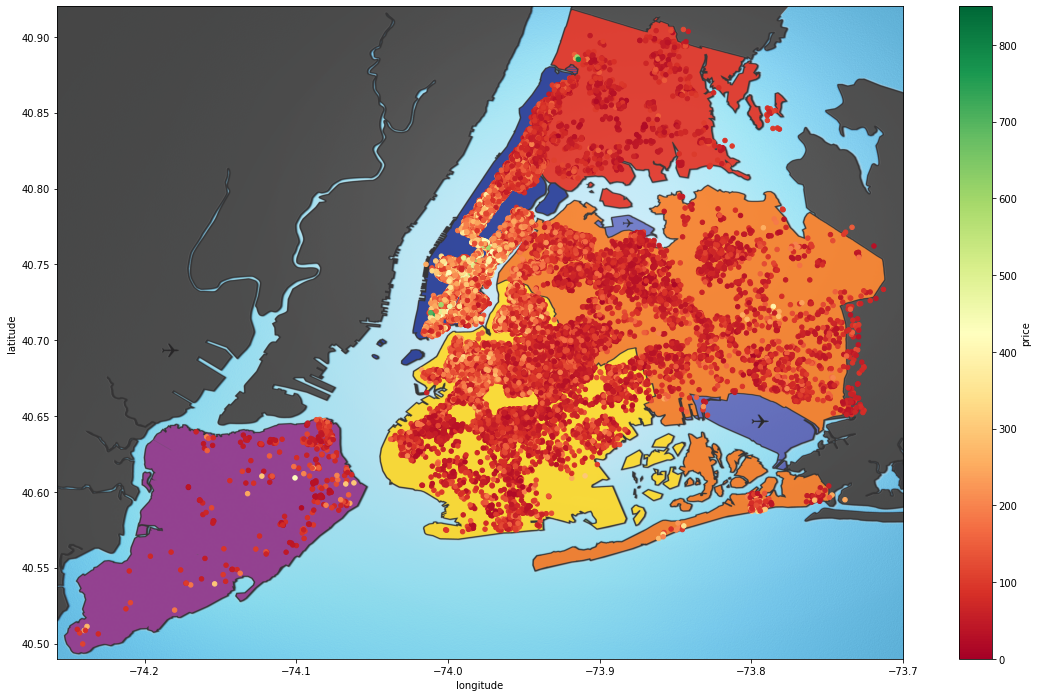

In [87]:
import urllib
plt.figure(figsize=[20,12])
g=urllib.request.urlopen("https://upload.wikimedia.org/wikipedia/commons/0/0d/5_Boroughs_New_York_City_Map_Julius_Schorzman.png")
x=plt.imread(g)
plt.imshow(x,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
axis=plt.gca()
data_cleaned.plot(kind="scatter",x="longitude",y="latitude",c="price",cmap="RdYlGn",colorbar=True,ax=axis,zorder=5)


In [88]:
### There are 3 airports in NYC with following coordinates:
##John F. Kennedy International Airport (JFK) (40.6413, -73.780968)
##Newark Liberty International Airport (EWR) (40.735657, -74.172363)
##LaGuardia Airport (LGA) (40.7747222222, -73.8719444444)

In [89]:
airport=[[40.6413, -73.780968],[40.735657, -74.172363],[40.7747222222, -73.8719444444]]

In [90]:
locations=data_cleaned[["latitude","longitude"]]

In [91]:
!pip install haversine
import haversine
from haversine import haversine_vector

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [92]:
distance_vector=haversine_vector(airport,locations,comb=True)

In [93]:
data_cleaned["JFK"]=distance_vector[:,0]
data_cleaned["EWR"]=distance_vector[:,1]
data_cleaned["LGA"]=distance_vector[:,2]

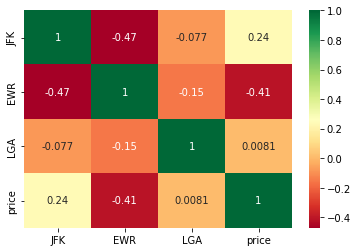

In [94]:
sns.heatmap(data_cleaned[["JFK","EWR","LGA","price"]].corr(),annot=True,cmap="RdYlGn")

## Heatmap shows only Newark airport has a co-relation with price, which means as distance between the properties and Newark airport increases, the price decreases

In [95]:
data_cleaned.availability_365.value_counts(normalize=True)*100
## Most properties have no availability at all. There could be several reasons for this, but we should remove it from our analysis

0.0      37.505679
365.0     2.317129
364.0     0.933919
1.0       0.888485
5.0       0.706749
           ...    
183.0     0.050482
195.0     0.050482
196.0     0.047958
181.0     0.042910
202.0     0.040386
Name: availability_365, Length: 366, dtype: float64

In [96]:
data_cleaned.availability_365.value_counts()

0.0      14859
365.0      918
364.0      370
1.0        352
5.0        280
         ...  
183.0       20
195.0       20
196.0       19
181.0       17
202.0       16
Name: availability_365, Length: 366, dtype: int64

In [97]:
data_cleaned_further=data_cleaned[data_cleaned["availability_365"]>0]
##This should be the focal point for our analysis

In [98]:
a=data_cleaned_further.availability_365.value_counts()

In [99]:
pd.DataFrame(a).reset_index().rename(columns={"index":"availability","availability_365":"No_of_properties"}).to_csv("availability.csv")

In [100]:
data_cleaned_further.groupby(by="availability_365")["host_id"]

In [101]:
data_cleaned_further["neighbourhood"].value_counts()

bedford-stuyvesant    2325
williamsburg          1890
harlem                1582
bushwick              1316
upper east side        991
                      ... 
prince's bay             2
silver lake              1
rossville                1
willowbrook              1
richmondtown             1
Name: neighbourhood, Length: 170, dtype: int64

In [102]:
data_cleaned_further.to_csv("data_cleaned_further.csv")
## For our analysis in Tableau

## Final Analysis with help of Python and Tableau

In [103]:
data_cleaned_further["borough"].value_counts()
## Brooklyn and Manhattan have the most number of properties

Brooklyn         10849
Manhattan         9450
Queens            3654
Bronx              521
Staten Island      285
Name: borough, dtype: int64

In [116]:
data_cleaned_further[data_cleaned_further["availability_365"]>=14].borough.value_counts(normalize=True)*100
## For our use case, i.e. the business traveler type

Brooklyn         43.386959
Manhattan        37.690956
Queens           15.416160
Bronx             2.244153
Staten Island     1.261773
Name: borough, dtype: float64

In [117]:
data_cleaned_further[data_cleaned_further["availability_365"]>=14].room_type.value_counts(normalize=True)*100

Private room       49.335316
Entire home/apt    47.758100
Shared room         2.906584
Name: room_type, dtype: float64

In [106]:
business_travel=data_cleaned_further[data_cleaned_further["availability_365"]>=14]

In [119]:
business_travel.to_csv("business.csv")
##In case we need it further

In [120]:
business_travel.availability_365.value_counts(normalize=True)*100
## 4% of prperties are available every day in the year

365.0    4.136812
364.0    1.667343
89.0     1.261773
90.0     1.049975
179.0    1.000406
           ...   
195.0    0.090127
183.0    0.090127
196.0    0.085620
181.0    0.076608
202.0    0.072101
Name: availability_365, Length: 352, dtype: float64

In [109]:
business_travel.groupby("borough").median()["availability_365"]
## Highest availability in Staten Island for business travelers

borough
Bronx            180.0
Brooklyn         173.0
Manhattan        197.0
Queens           180.0
Staten Island    258.0
Name: availability_365, dtype: float64

In [110]:
business_travel.groupby("neighbourhood").median().sort_values("availability_365",ascending=False)["availability_365"]
## Median availability for business travelers

neighbourhood
co-op city           364.0
port richmond        363.0
willowbrook          351.0
castleton corners    350.0
bellerose            348.0
                     ...  
new springville       88.0
woodlawn              78.5
downtown brooklyn     67.5
rossville             59.0
todt hill             52.0
Name: availability_365, Length: 170, dtype: float64

In [111]:
data_cleaned_further.groupby("neighbourhood").median().sort_values("availability_365",ascending=False)["availability_365"]
## Overall availability after removing properties which are never available

neighbourhood
co-op city           364.0
port richmond        363.0
willowbrook          351.0
castleton corners    350.0
bellerose            348.0
                     ...  
rossville             59.0
arden heights         55.0
todt hill             52.0
downtown brooklyn     39.0
navy yard             32.0
Name: availability_365, Length: 170, dtype: float64

In [112]:
business_travel[business_travel["neighbourhood"]=="co-op city"]
## Co-op city is in Bronx borough

,Unnamed: 0,name,host_id,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,JFK,EWR,LGA
2662,3050,DOMINIQUE'S NY*Wanderlust room/Metro/Bronx Zoo...,310670,Bronx,co-op city,40.86317,-73.82494,Private room,75.0,2.0,32.0,0.46,13.0,363.0,24.947350,32.500229,10.600556
3591,4094,Charming Cozy Cool 2BR Apartment.,12360441,Bronx,co-op city,40.86646,-73.82154,Private room,80.0,3.0,2.0,0.03,1.0,365.0,25.268849,32.917328,11.047437


In [113]:
business_travel[business_travel["neighbourhood"]=="todt hill"]
##Todt Hill is in Staten Island

,Unnamed: 0,name,host_id,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,JFK,EWR,LGA
32491,37017,Large Studio Apartment on Todt Hill,146363617,Staten Island,todt hill,40.58392,-74.10780,Entire home/apt,62.0,14.0,4.0,0.56,1.0,268.0,28.316484,17.729551,29.080928
37495,42818,1 room in private house - 15 mins to NYC & Ferry,161357125,Staten Island,todt hill,40.60991,-74.11577,Private room,50.0,2.0,6.0,2.02,3.0,52.0,28.470328,14.774582,27.539883
38391,43870,3 Bedroom Full house - 15mins to NYC/Ferry,161357125,Staten Island,todt hill,40.61041,-74.11593,Entire home/apt,135.0,3.0,2.0,0.86,3.0,36.0,28.476865,14.717602,27.512944


In [121]:
business_travel[business_travel["neighbourhood"]=="navy yard"]
## Navy Yard is in Brooklyn

,Unnamed: 0,name,host_id,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,JFK,EWR,LGA
4482,5110,"Brooklyn Loft Studio, One Subway from Manhattan",2076525,Brooklyn,navy yard,40.69839,-73.97666,Entire home/apt,125.0,14.0,15.0,0.41,1.0,32.0,17.683204,17.006296,12.242681
18271,20872,"Master Suite in Lovely, Sunny DUMBO Apartment",1649108,Brooklyn,navy yard,40.70095,-73.98006,Private room,135.0,1.0,50.0,1.87,3.0,29.0,18.053466,16.659995,12.258292
28105,31957,My new place,182690453,Brooklyn,navy yard,40.69833,-73.97087,Private room,140.0,2.0,37.0,2.64,1.0,157.0,17.225875,17.481559,11.900694
28280,32154,Brooklyn Loft,1494472,Brooklyn,navy yard,40.69823,-73.97357,Entire home/apt,150.0,21.0,0.0,0.00,2.0,365.0,17.433770,17.263286,12.068951


## Rest of the Analysis finished in Tableau with information distilled in the presentation